Basado en el ejemplo de forecasting, prediga el precio de stock ( de apertura) para el sigueinte dataset 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'. Primero implmente una arquitectura many-to-one, para predecir el valores de stock un tiempo adelante, lego convierta el problema en un many-to-many para predecir el valor de stock 10 pasos temporales adelante

In [ ]:
%tensorflow_version 2.x

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
data_set = pd.read_csv(url)

In [ ]:
data_set.head(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.1,233.8,233.25,5082859,11859.95


In [ ]:
data_set.tail(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2033,2010-07-22,120.3,122.0,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.0,121.05,121.10,121.55,658666,803.56


In [ ]:
data_set.shape

(2035, 8)

In [ ]:
data_set = data_set.reindex(index= data_set.index[::-1])

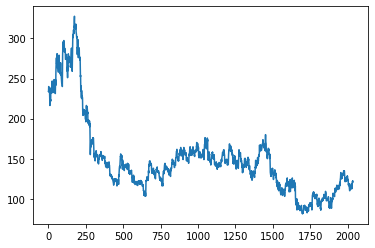

In [ ]:
plt.plot(data_set['Open'])

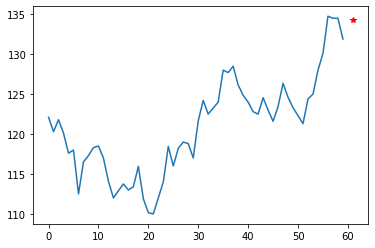

In [ ]:
plt.plot(np.arange(0,60),data_set.iloc[:60,1])
plt.plot(61,data_set.iloc[60,1],'r*')

In [ ]:
data_set = data_set[['Open']]
scale = StandardScaler()
data_set = scale.fit_transform(data_set)

In [ ]:

X = []
y = []
for i in np.arange(60,2035):
  X.append(data_set[i-60:i,0])
  y.append(data_set[i,0])

X = np.array(X)
y = np.array(y)

In [ ]:
X = X.reshape((-1,60,1))

In [ ]:
y = y.reshape((-1,1))

In [ ]:
print(X.shape, y.shape)

(1975, 60, 1) (1975, 1)


In [ ]:
X_train, X_test , y_train,y_test = train_test_split(X,y)

In [ ]:
X_train.shape

(1481, 60, 1)

In [ ]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True , input_shape=[None,1]),
    keras.layers.LSTM(20),
    keras.layers.Dense(1)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 20)          1760      
                                                                 
 lstm_1 (LSTM)               (None, 20)                3280      
                                                                 
 dense (Dense)               (None, 1)                 21        
                                                                 
Total params: 5,061
Trainable params: 5,061
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='mse', optimizer='nadam')

In [ ]:
model.fit(X_train,y_train, epochs=10, validation_split=0.2, validation_data=(X_test,y_test))

Epoch 1/10
37/37 [==============================] - 14s 131ms/step - loss: 0.5615 - val_loss: 0.0960
Epoch 2/10
37/37 [==============================] - 2s 64ms/step - loss: 0.0704 - val_loss: 0.0412
Epoch 3/10
37/37 [==============================] - 3s 74ms/step - loss: 0.0387 - val_loss: 0.0276
Epoch 4/10
37/37 [==============================] - 2s 65ms/step - loss: 0.0335 - val_loss: 0.0249
Epoch 5/10
37/37 [==============================] - 2s 67ms/step - loss: 0.0313 - val_loss: 0.0237
Epoch 6/10
37/37 [==============================] - 3s 68ms/step - loss: 0.0283 - val_loss: 0.0225
Epoch 7/10
37/37 [==============================] - 2s 59ms/step - loss: 0.0274 - val_loss: 0.0196
Epoch 8/10
37/37 [==============================] - 2s 59ms/step - loss: 0.0266 - val_loss: 0.0179
Epoch 9/10
37/37 [==============================] - 3s 67ms/step - loss: 0.0246 - val_loss: 0.0181
Epoch 10/10
37/37 [==============================] - 2s 62ms/step - loss: 0.0232 - val_loss: 0.0165


In [ ]:
y_predict = model.predict(X_test)

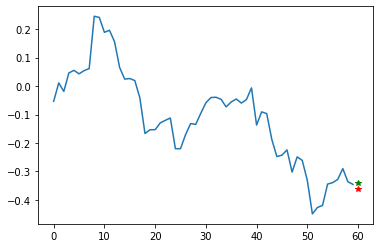

In [ ]:
plt.plot(X_test[0,:,0])
plt.plot(60, y_predict[0], 'r*')
plt.plot(60,y_test[0], 'g*')

In [ ]:
prediction = model.predict(data_set.reshape((1,-1,1)))

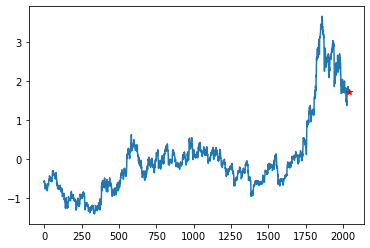

In [ ]:
plt.plot(data_set)
plt.plot(2036,prediction, 'r*')